In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
!pip install geneticalgorithm
from geneticalgorithm import geneticalgorithm  # Custom GA implementation (provided below)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15077 sha256=fb5be600854720da96aac41f4c2eb1bf73d2b650d5922bfdc493fa080bd5ce9a
  Stored in directory: /root/.cache/pip/wheels/07/e6/86/f23164d12c3134966614102db8e7956ab359faf7ffd78703ce
Successfully built func-timeout


# Dataset

In [ ]:
!pip install opendatasets
import opendatasets as od

2fe1724809ec823ec02d4475df499fe8

In [ ]:
od.download("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rusheelsharma
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:25:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:25:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:25:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:25:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:25:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Feature Selection Comparison:
              Method  Accuracy  Precision    Recall  F1-Score
0  Genetic Algorithm  0.987927   0.788991  0.877551  0.830918
1        SelectKBest  0.988962   0.811321  0.877551  0.843137
2                RFE  0.987927   0.773913  0.908163  0.835681


<ipython-input-7-2bfbd7afce12>:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Method', y=metric, ax=axes[i], palette='viridis')
<ipython-input-7-2bfbd7afce12>:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Method', y=metric, ax=axes[i], palette='viridis')
<ipython-input-7-2bfbd7afce12>:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Method', y=metric, ax=axes[i], palette='viridis')
<ipython-input-7-2bfbd7afce12>:133: FutureWarning: 

Passing `palette` without assigning `h

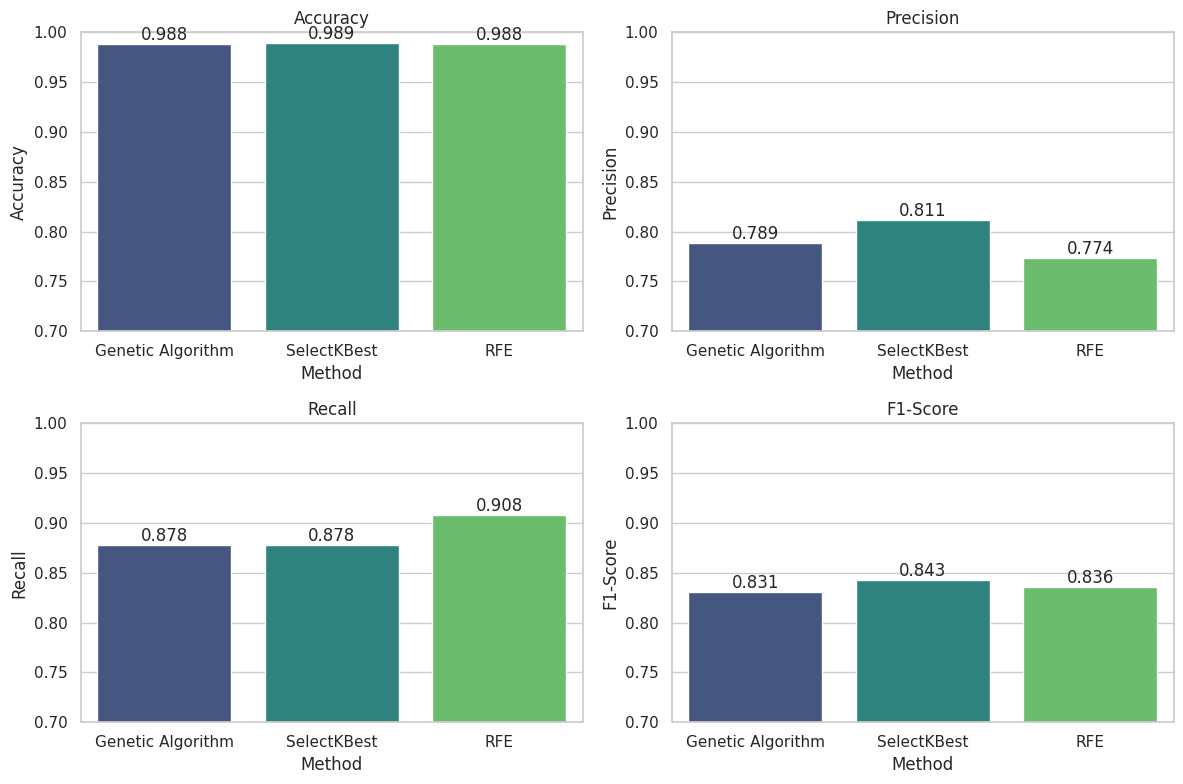

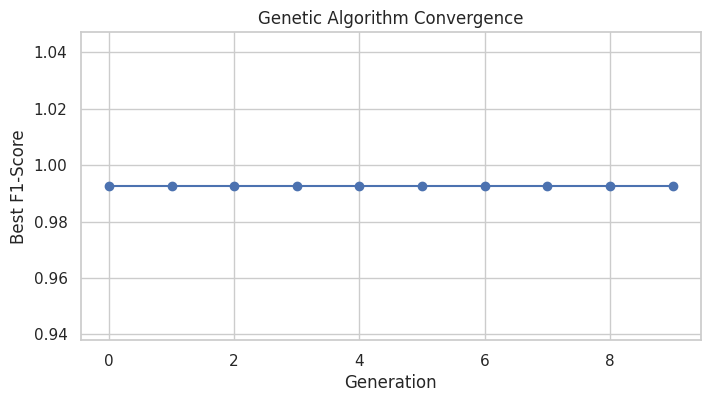

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE



# Settings
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 100

# Load and sample data
def load_data():
    df = pd.read_csv("/content/creditcardfraud/creditcard.csv")
    fraud = df[df['Class'] == 1]
    non_fraud = df[df['Class'] == 0].sample(n=14000, random_state=42)
    df_sampled = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=42)
    return df_sampled

# Preprocess with scaling and SMOTE
def preprocess(df):
    X = df.drop("Class", axis=1)
    y = df["Class"]
    X_scaled = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, stratify=y, random_state=42
    )
    X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train, y_train)
    return X_train_res, X_test, y_train_res, y_test

# Genetic Algorithm
class GeneticAlgorithmOptimizer:
    def __init__(self, n_features, population_size=10, generations=10):
        self.n_features = n_features
        self.population_size = population_size
        self.generations = generations

    def initialize_population(self):
        return np.random.randint(2, size=(self.population_size, self.n_features))

    def fitness(self, individual, X_train, y_train, X_val, y_val):
        selected = individual.astype(bool)
        if not np.any(selected):
            return 0
        model = XGBClassifier(n_estimators=30, use_label_encoder=False, eval_metric='logloss', random_state=42)
        model.fit(X_train[:, selected], y_train)
        y_pred = model.predict(X_val[:, selected])
        return f1_score(y_val, y_pred)

    def run(self, X_train, y_train):
        X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
        population = self.initialize_population()
        best_score, best_individual = -np.inf, None
        history = []

        for gen in range(self.generations):
            scores = np.array([self.fitness(ind, X_tr, y_tr, X_val, y_val) for ind in population])
            best_idx = np.argmax(scores)
            if scores[best_idx] > best_score:
                best_score = scores[best_idx]
                best_individual = population[best_idx]
            selected = [population[np.argmax(scores[np.random.choice(self.population_size, 3)])]
                        for _ in range(self.population_size)]
            children = []
            for i in range(0, self.population_size, 2):
                if i+1 >= len(selected): break
                pt = np.random.randint(1, self.n_features - 1)
                c1 = np.concatenate((selected[i][:pt], selected[i+1][pt:]))
                c2 = np.concatenate((selected[i+1][:pt], selected[i][pt:]))
                children.extend([c1, c2])
            # Mutation
            for child in children:
                mask = np.random.rand(self.n_features) < 0.1
                child[mask] = 1 - child[mask]
            population = np.array(children)
            history.append(best_score)
        return best_individual.astype(bool), history

# Feature selection comparison
def evaluate_feature_selection(X_train, X_test, y_train, y_test, selected_features, method_name):
    model = XGBClassifier(n_estimators=30, use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train[:, selected_features], y_train)
    y_pred = model.predict(X_test[:, selected_features])
    return {
        "Method": method_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

# Main pipeline
df = load_data()
X_train, X_test, y_train, y_test = preprocess(df)
n_features = X_train.shape[1]

# Genetic Algorithm
ga = GeneticAlgorithmOptimizer(n_features)
ga_features, history = ga.run(X_train, y_train)
ga_result = evaluate_feature_selection(X_train, X_test, y_train, y_test, ga_features, "Genetic Algorithm")

# SelectKBest
skb = SelectKBest(score_func=f_classif, k=20).fit(X_train, y_train)
skb_features = skb.get_support()
skb_result = evaluate_feature_selection(X_train, X_test, y_train, y_test, skb_features, "SelectKBest")

# RFE
rfe = RFE(XGBClassifier(n_estimators=30, use_label_encoder=False, eval_metric='logloss'), n_features_to_select=20)
rfe.fit(X_train, y_train)
rfe_features = rfe.get_support()
rfe_result = evaluate_feature_selection(X_train, X_test, y_train, y_test, rfe_features, "RFE")

# Results
results_df = pd.DataFrame([ga_result, skb_result, rfe_result])
print("\nFeature Selection Comparison:")
print(results_df)

# Visualize
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(data=results_df, x='Method', y=metric, ax=axes[i], palette='viridis')
    axes[i].set_title(metric)
    axes[i].set_ylim(0.7, 1.0)
    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2, p.get_height()),
                         ha='center', va='bottom')

plt.tight_layout()
plt.show()

# GA convergence
plt.figure(figsize=(8, 4))
plt.plot(history, marker='o')
plt.title("Genetic Algorithm Convergence")
plt.xlabel("Generation")
plt.ylabel("Best F1-Score")
plt.grid(True)
plt.show()
